In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

In [3]:
from keras.layers import Convolution2D, MaxPool2D, Dropout, Flatten, Dense, Conv2D

In [4]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random

In [5]:
datadir= 'record'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data= pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names= columns)

In [6]:
data.head()

center  \
0  C:\Users\anura\Downloads\simulator-windows-64\...   
1  C:\Users\anura\Downloads\simulator-windows-64\...   
2  C:\Users\anura\Downloads\simulator-windows-64\...   
3  C:\Users\anura\Downloads\simulator-windows-64\...   
4  C:\Users\anura\Downloads\simulator-windows-64\...   

                                                left  \
0   C:\Users\anura\Downloads\simulator-windows-64...   
1   C:\Users\anura\Downloads\simulator-windows-64...   
2   C:\Users\anura\Downloads\simulator-windows-64...   
3   C:\Users\anura\Downloads\simulator-windows-64...   
4   C:\Users\anura\Downloads\simulator-windows-64...   

                                               right  steering  throttle  \
0   C:\Users\anura\Downloads\simulator-windows-64...       0.0       0.0   
1   C:\Users\anura\Downloads\simulator-windows-64...       0.0       0.0   
2   C:\Users\anura\Downloads\simulator-windows-64...       0.0       0.0   
3   C:\Users\anura\Downloads\simulator-windows-64...       0.0       0.0   
4   C:\Users\anura\Downloads\simulator-windows-64...       0.0       0.0   

   reverse     speed  
0      0.0  0.000080  
1      0.0  0.000082  
2      0.0  0.000078  
3      0.0  0.000078  
4      0.0  0.000078

In [7]:
def path_leaf(path):
    head, tail= ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2024_05_24_00_50_49_791.jpg  left_2024_05_24_00_50_49_791.jpg   
1  center_2024_05_24_00_50_49_893.jpg  left_2024_05_24_00_50_49_893.jpg   
2  center_2024_05_24_00_50_49_993.jpg  left_2024_05_24_00_50_49_993.jpg   
3  center_2024_05_24_00_50_50_094.jpg  left_2024_05_24_00_50_50_094.jpg   
4  center_2024_05_24_00_50_50_195.jpg  left_2024_05_24_00_50_50_195.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2024_05_24_00_50_49_791.jpg       0.0       0.0      0.0  0.000080  
1  right_2024_05_24_00_50_49_893.jpg       0.0       0.0      0.0  0.000082  
2  right_2024_05_24_00_50_49_993.jpg       0.0       0.0      0.0  0.000078  
3  right_2024_05_24_00_50_50_094.jpg       0.0       0.0      0.0  0.000078  
4  right_2024_05_24_00_50_50_195.jpg       0.0       0.0      0.0  0.000078

# Data Visualization

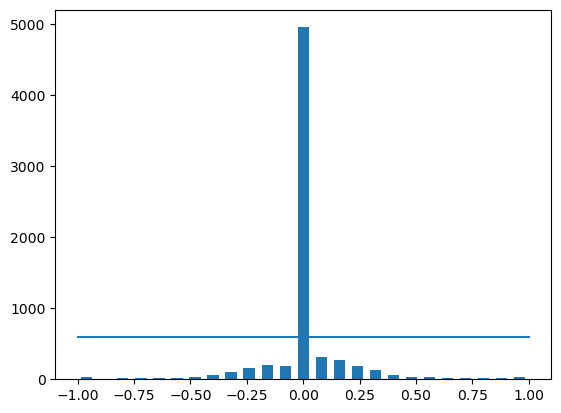

In [8]:
num_bins = 25
samples_per_bin= 600
hist, bins= np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [9]:
print('total data:', len(data))
print (data.shape)

total data: 6922
(6922, 7)


In [10]:
remove_list= []
for j in range (num_bins):
    list_=[]
    for i in  range (len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_= shuffle(list_)
    list_= list_[samples_per_bin:]
    remove_list.extend(list_)

print('removed: ', len(remove_list))
data.drop(data.index[remove_list], inplace= True)
print('remaining: ', len(data))

removed:  4356
remaining:  2566


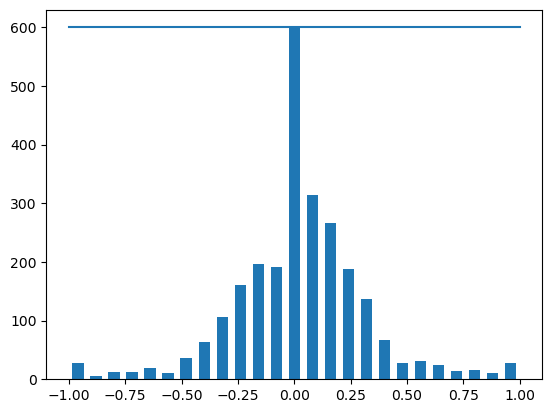

In [11]:
hist, _= np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width= 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [12]:
def load_img_steering(datadir, df):
    image_path= []
    steering = []
    for i in range (len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        #center image append
        image_path.append(os.path. join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        #right image append
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3])+0.15)
        #left image append
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3])-0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

In [13]:
image_paths, steerings= load_img_steering(datadir + '/IMG', data)

C:\Users\anura\AppData\Local\Temp\ipykernel_9692\819740033.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
C:\Users\anura\AppData\Local\Temp\ipykernel_9692\819740033.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  steering.append(float(indexed_data[3]))
C:\Users\anura\AppData\Local\Temp\ipykernel_9692\819740033.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

In [14]:
image_paths, len(image_paths)

(array(['record/IMG\\center_2024_05_24_00_50_52_222.jpg',
        'record/IMG\\right_2024_05_24_00_50_52_222.jpg',
        'record/IMG\\left_2024_05_24_00_50_52_222.jpg', ...,
        'record/IMG\\center_2024_05_24_01_08_38_451.jpg',
        'record/IMG\\right_2024_05_24_01_08_38_451.jpg',
        'record/IMG\\left_2024_05_24_01_08_38_451.jpg'], dtype='<U45'),
 7698)

In [15]:
steerings, len(steerings)

(array([ 0.  ,  0.15, -0.15, ...,  0.  ,  0.15, -0.15]), 7698)

# Spliting training set and validation set

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples:{}\nValid Samples:{}'.format(len(X_train), len(X_valid)))

Training Samples:6158
Valid Samples:1540


Text(0.5, 1.0, 'Validation Set')

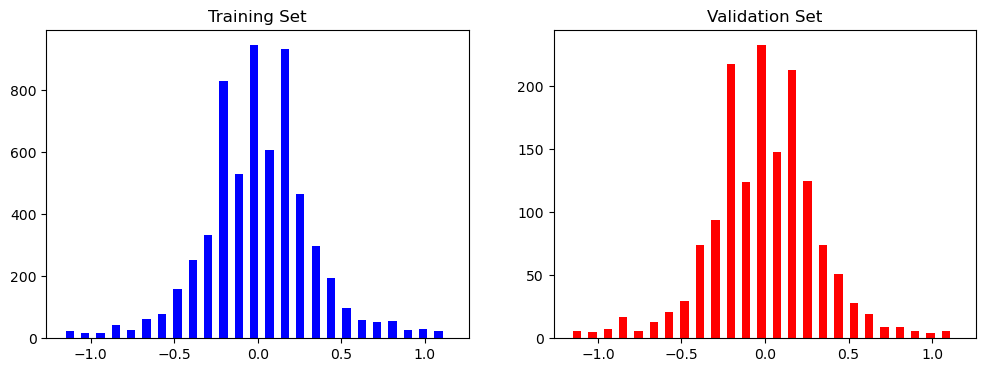

In [17]:
fig, axes = plt.subplots(1,2,figsize= (12,4))
axes[0].hist(y_train, bins= num_bins, width= 0.05, color=  'blue')
axes[0].set_title('Training Set')
axes[1].hist(y_valid, bins= num_bins, width= 0.05, color= 'red')
axes[1].set_title('Validation Set')

# Data Augmentation

In [18]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image
    
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

Text(0.5, 1.0, 'Zoomed Image')

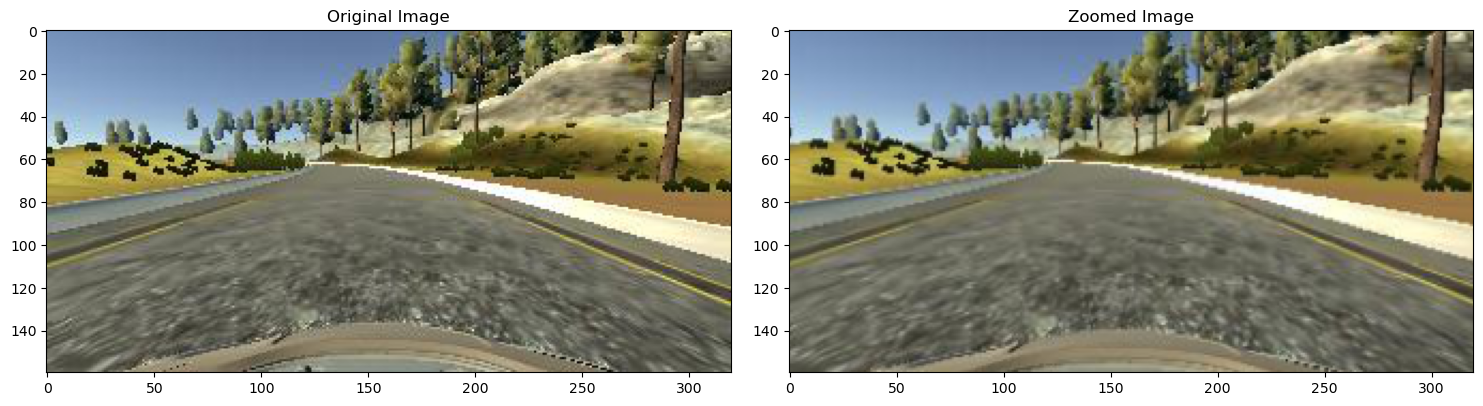

In [19]:
fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [20]:
def pan(image):
    pan= iaa.Affine(translate_percent={"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
    image =pan.augment_image(image)
    return image

Text(0.5, 1.0, 'Panned Image')

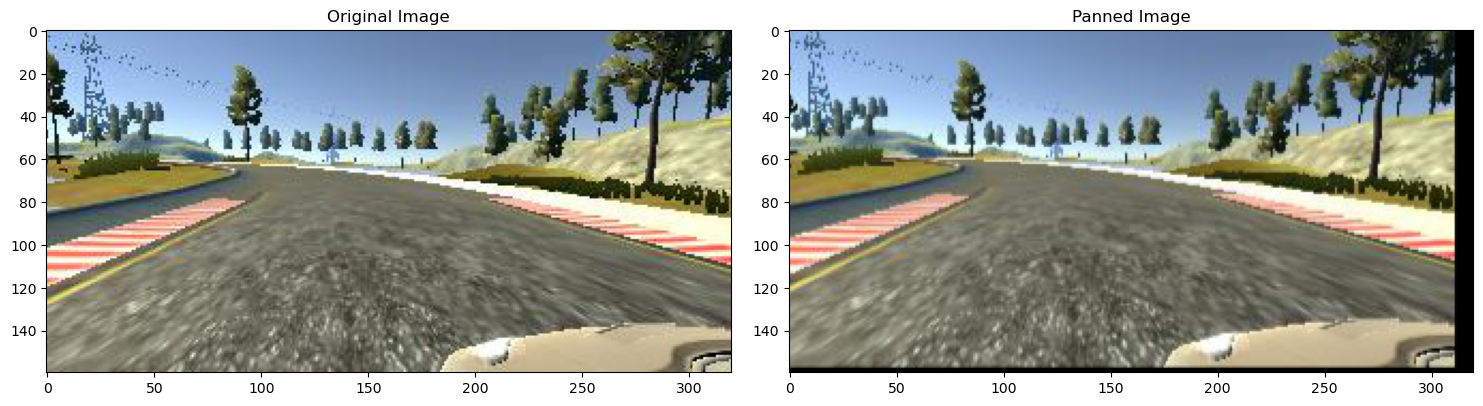

In [21]:
image = image_paths[random.randint(0, 1000)]
original_image= mpimg.imread(image)
panned_image = pan(original_image)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness Altered Image')

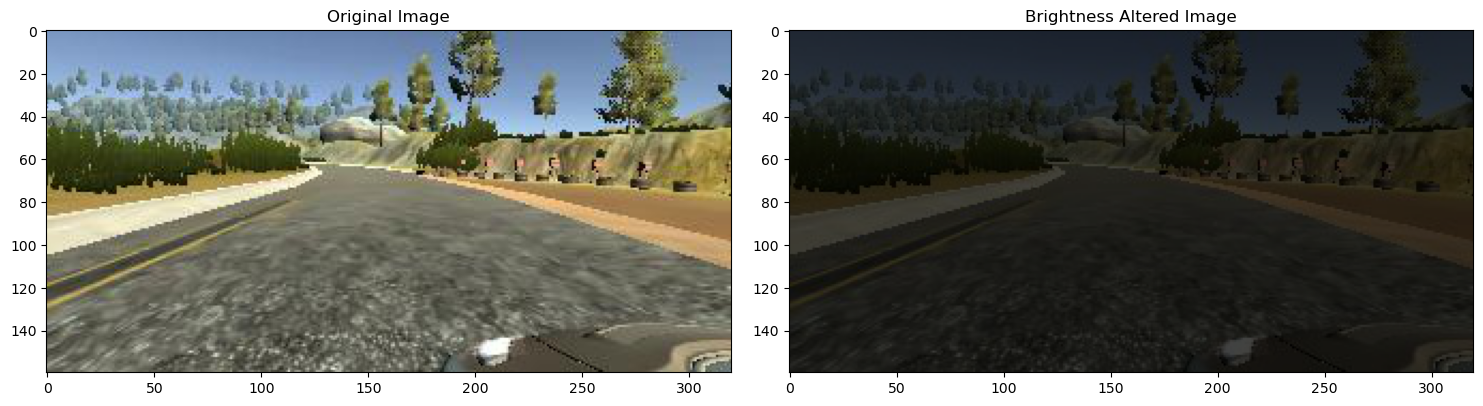

In [22]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

image= image_paths[random.randint(0, 1000)]
original_image= mpimg.imread(image)
brightness_altered_image = img_random_brightness (original_image)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness Altered Image')

Text(0.5, 1.0, 'Flipped Image- Steering Angle: 0.4425441')

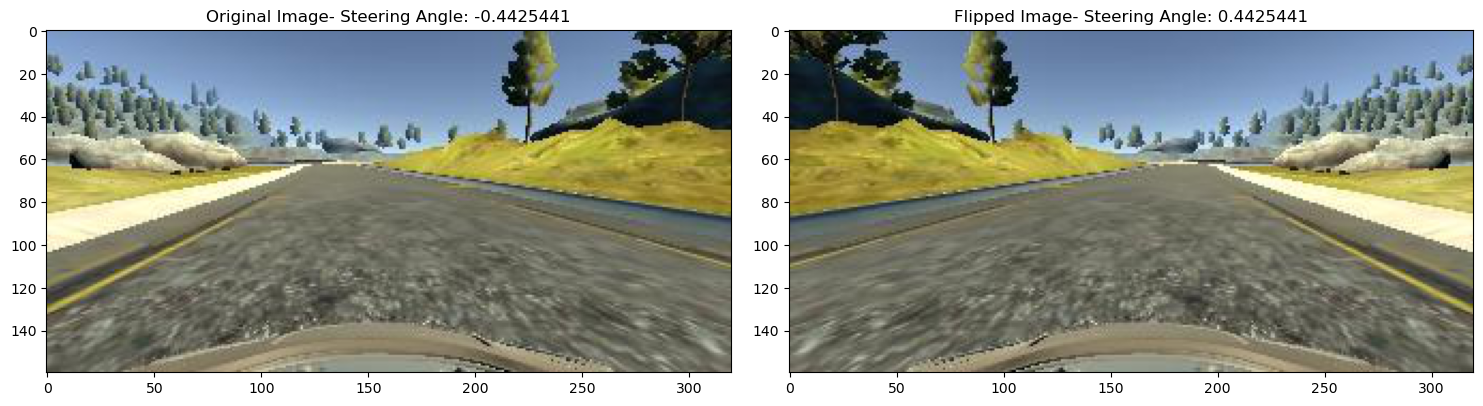

In [23]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle

random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]

original_image= mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs= plt.subplots(1,2,figsize= (15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image- ' + 'Steering Angle: '+ str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image- '+ 'Steering Angle: ' + str(flipped_steering_angle))

In [24]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand()<0.5:
        image= zoom(image)
    if np.random.rand()< 0.5:
        image= img_random_brightness(image)
    if np.random.rand()<0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

Text(0.5, 1.0, 'Augmented Image')

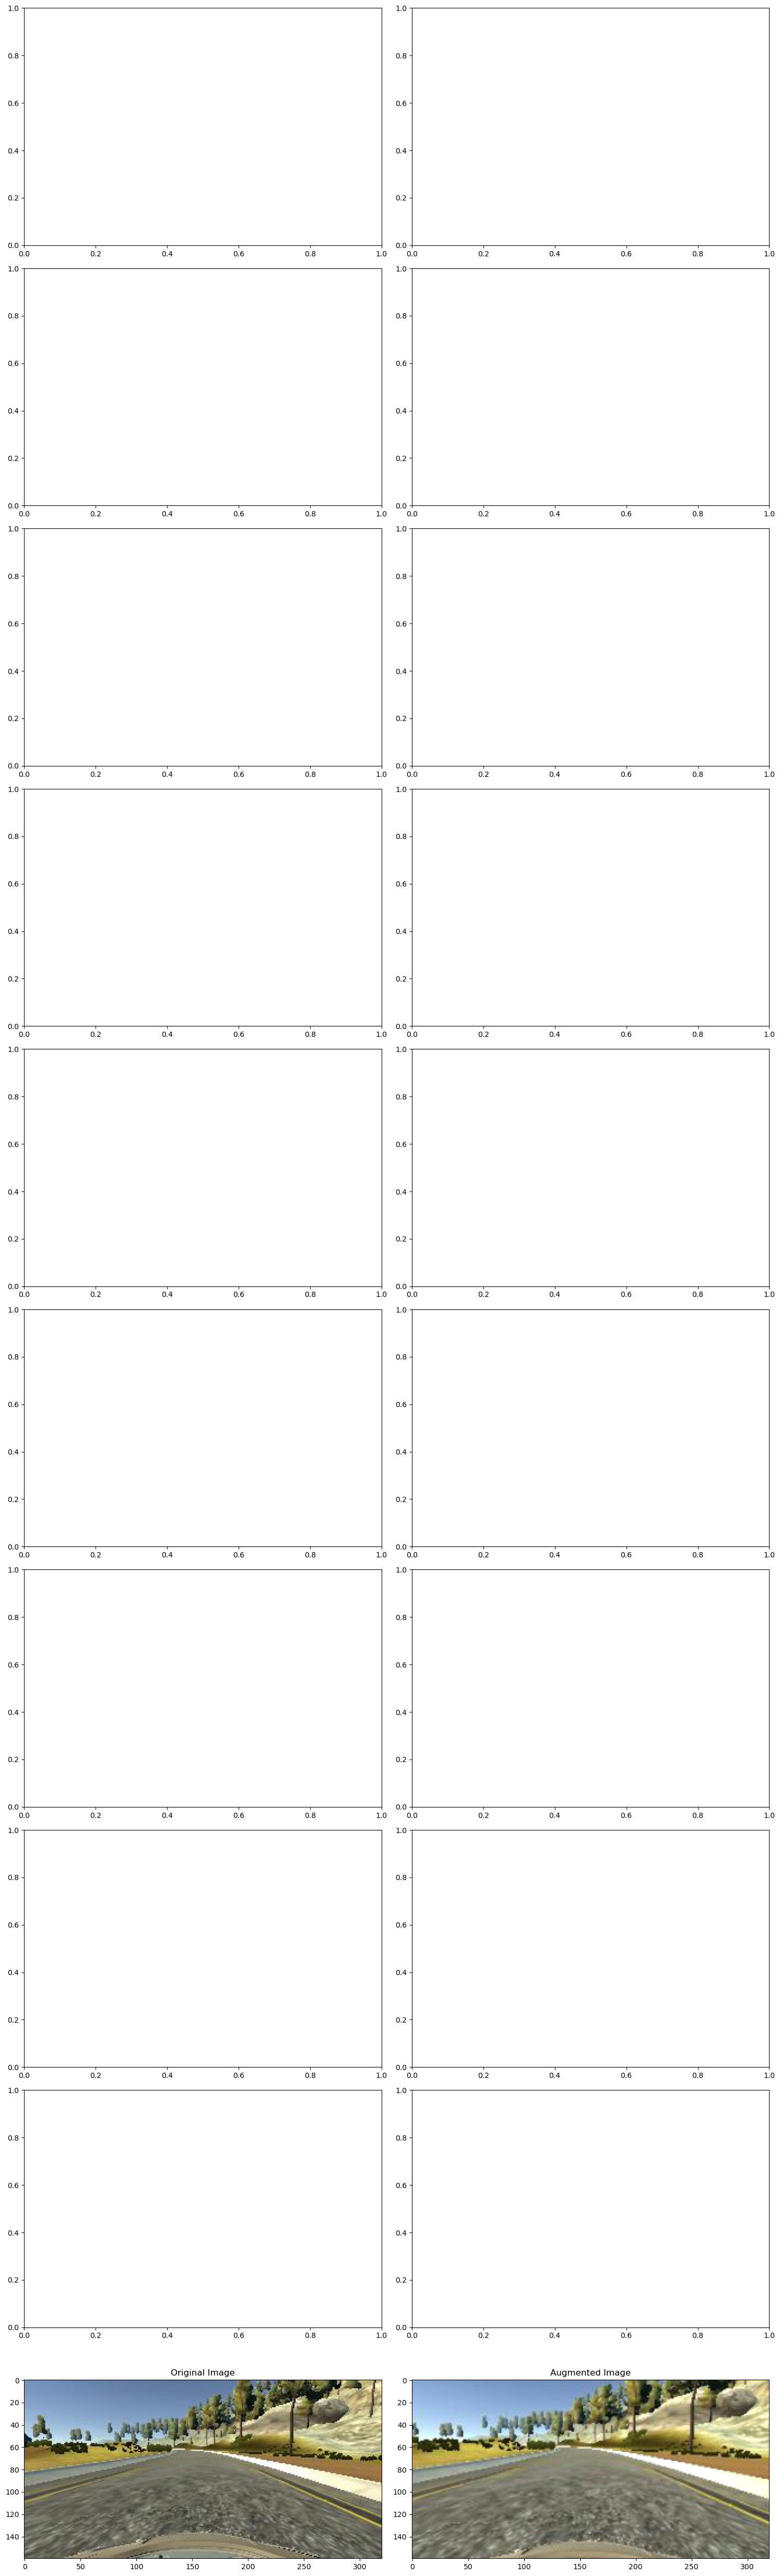

In [25]:
ncol= 2
nrow= 10

fig, axs = plt.subplots(nrow, ncol, figsize = (15, 50))
fig.tight_layout()

for i in range(10):
    randnum= random.randint(0, len(image_paths)-1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]

    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)

axs[i][0].imshow(original_image)
axs[i][0].set_title("Original Image")

axs[i][1].imshow(augmented_image)
axs[i][1].set_title("Augmented Image")

# Image Preprocessing

In [36]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3),0)
    img = cv2.resize(img, (200, 66))
    img= img/255
    return img

Text(0.5, 1.0, 'Preprocessed Iamge')

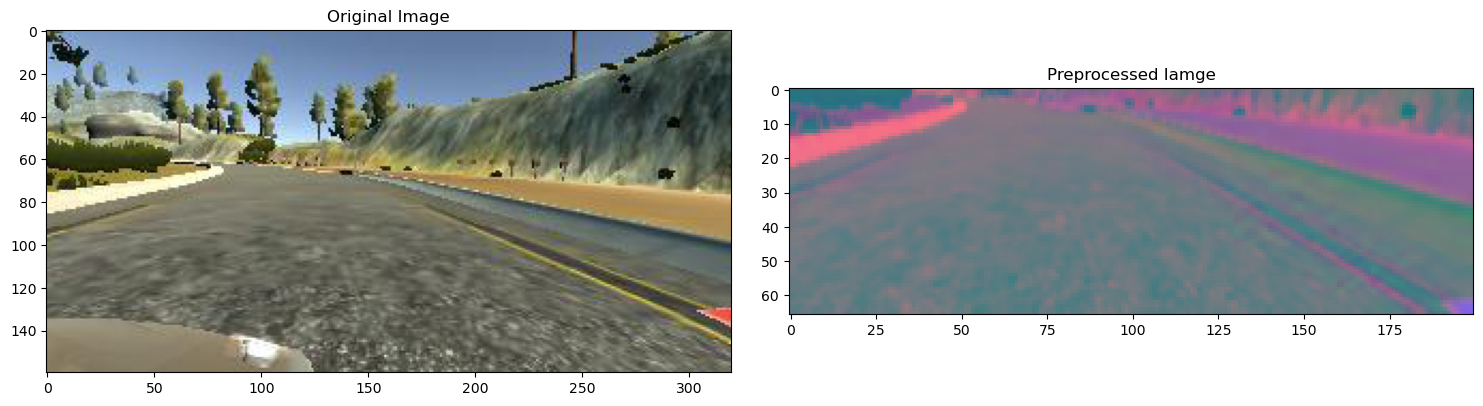

In [37]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1,2, figsize= (15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Iamge')                 

In [38]:
!nvidia-smi

Mon Jun 24 11:57:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.26                 Driver Version: 546.26       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   48C    P8               2W /  30W |    127MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [55]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths)-1)
            
            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

            else:
                im = mpimg.imread(image_paths[random_index])
                steering =steering_ang[random_index]
                
            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

In [56]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

Text(0.5, 1.0, 'Validation Image')

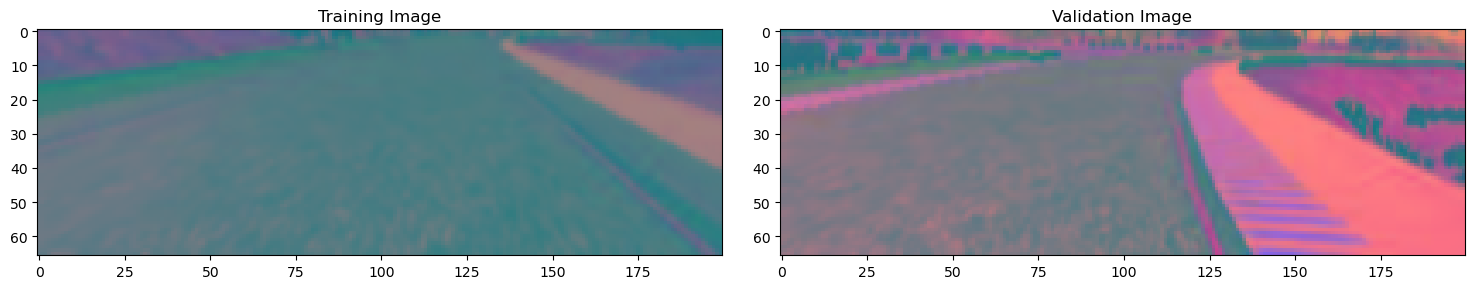

In [57]:
fig, axs = plt.subplots(1,2,figsize =( 15,10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')